# Telecom Customer Churn
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd

pd.read_csv("data/customer_churn.csv")

df = pd.read_csv("data/customer_churn.csv")

## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which age groups send more SMS messages than make phone calls?
- 📊 **Visualize**: Create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).
- 🔎 **Analyze**: Are there significant diffe|rences between the length of phone calls between different tariff plans?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired by a telecom company. A competitor has recently entered the market and is offering an attractive plan to new customers. The telecom company is worried that this competitor may start attracting its customers.

You have access to a dataset of the company's customers, including whether customers churned. The telecom company wants to know whether you can use this data to predict whether a customer will churn. They also want to know what factors increase the probability that a customer churns.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

# 1- Libraries Import

First, let's import the necessary libraries. We'll be using pandas and numpy for data manipulation and matplotlib and seaborn for visualization.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2- Conduct EDA

Display the first few rows of the dataset to get an idea of the data structure.

In [3]:
df.head()


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


Display summary statistics for the dataset.

In [4]:
df.describe()


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


Check for missing values.

In [5]:
df.isnull().sum()


Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

Visualize the distribution of the 'Frequency of SMS' and 'Frequency of use' columns for different age groups using box plots.

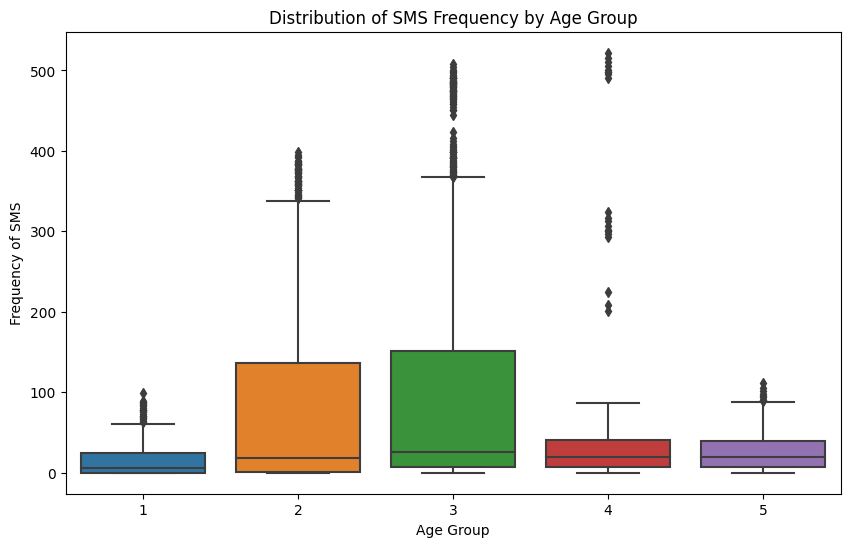

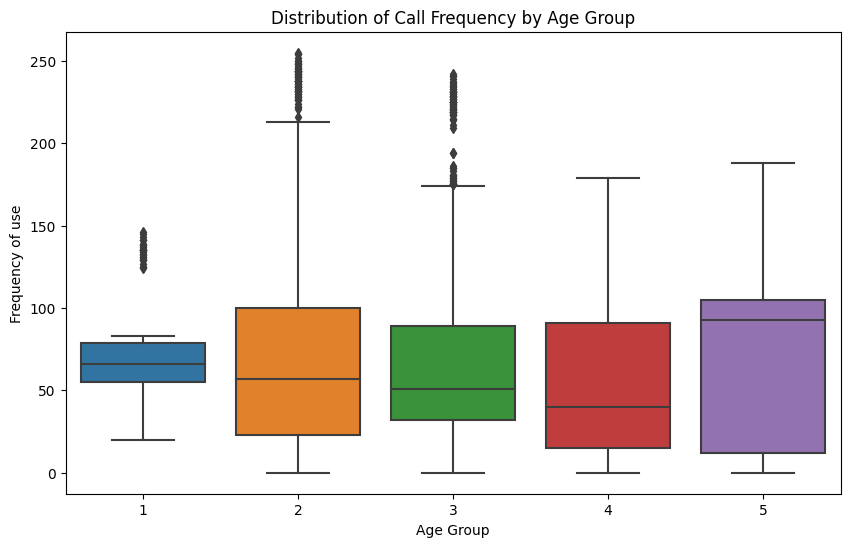

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Frequency of SMS', data=df)
plt.title('Distribution of SMS Frequency by Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Frequency of use', data=df)
plt.title('Distribution of Call Frequency by Age Group')
plt.show()


Visualize the correlation between the features using a heatmap.

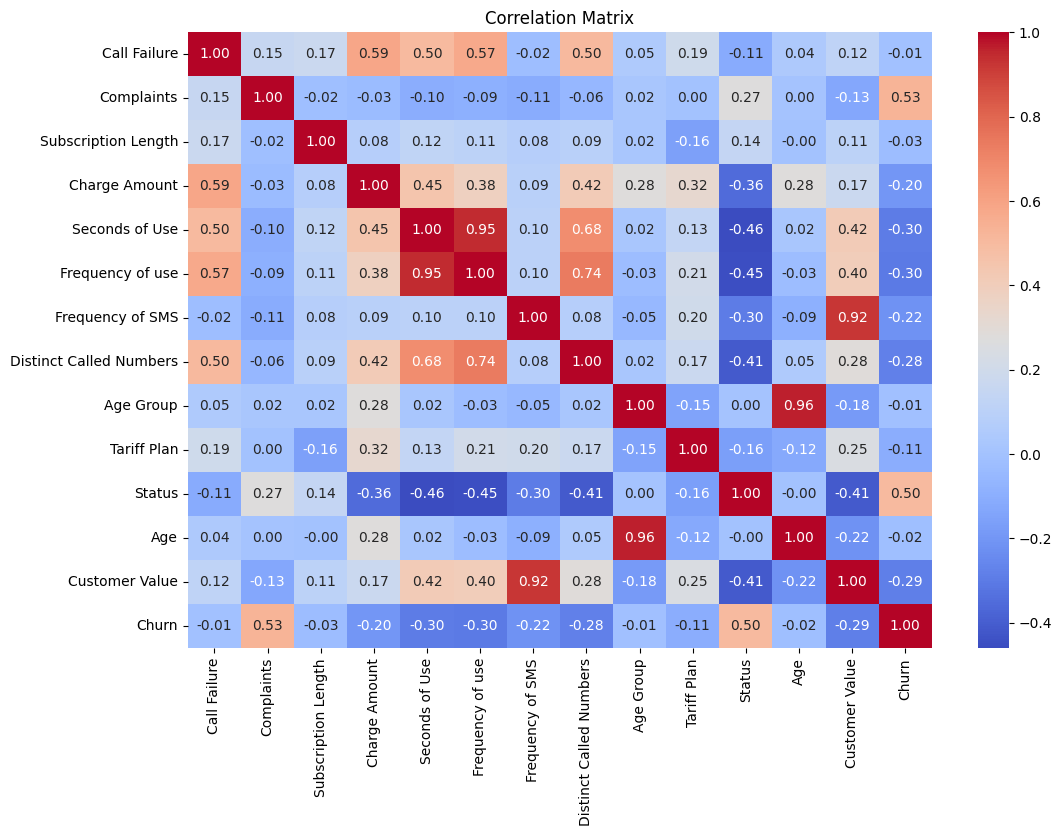

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 3- Data preprocessing
Now that you've completed the EDA, let's preprocess the data. We'll follow these steps:

Handle missing values
Encode categorical variables (if necessary)
Scale/normalize the data (if necessary)
Here's how you can perform these preprocessing steps:

## a- Handle missing values:
Check for missing values and handle them accordingly. In this case, we'll use the mean value for numeric columns and mode value for categorical columns.



In [8]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean for numeric columns
for col in df.select_dtypes(include=['int64', 'float64']):
    df[col] = df[col].fillna(df[col].mean())

# Fill missing values with the mode for categorical columns
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = df[col].fillna(df[col].mean()[0])

# Check again for missing values
print(df.isnull().sum())


Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64
Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


## b- Encode categorical variables (if necessary):
If there are any categorical variables that need to be encoded, you can use one-hot encoding or label encoding. In this dataset, it seems like all categorical variables are already encoded. However, if you find a column that needs encoding, you can use the following code:

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Specify the columns to be one-hot encoded
categorical_columns = ['Complaints', 'Age Group', 'Tariff Plan', 'Status']

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame for the encoded columns and set the column names
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_columns, inplace=True)

# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the DataFrame
print(df.columns)
print(df.head())


Index(['Call Failure', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age', 'Customer Value', 'Churn',
       'Complaints_1', 'Age Group_2', 'Age Group_3', 'Age Group_4',
       'Age Group_5', 'Tariff Plan_2', 'Status_2'],
      dtype='object')
   Call Failure  Subscription Length  ...  Tariff Plan_2  Status_2
0             8                   38  ...            0.0       0.0
1             0                   39  ...            0.0       1.0
2            10                   37  ...            0.0       0.0
3            10                   38  ...            0.0       0.0
4             3                   38  ...            0.0       0.0

[5 rows x 17 columns]


Let's rename the new columns with meaningful names.

In [10]:
# Rename the columns
df = df.rename(columns={
    'Complaints_1': 'Complained?',
    'Tariff Plan_2': 'Contractual_plan',
    'Status_2': 'non_active?'
})

# Display the first few rows of the DataFrame
print(df.head())


   Call Failure  Subscription Length  ...  Contractual_plan  non_active?
0             8                   38  ...               0.0          0.0
1             0                   39  ...               0.0          1.0
2            10                   37  ...               0.0          0.0
3            10                   38  ...               0.0          0.0
4             3                   38  ...               0.0          0.0

[5 rows x 17 columns]


## c- Removing outliers

we will remove

In [11]:
import numpy as np

# List the columns to remove outliers from
columns_to_check = ['Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers']

# Loop through the columns and remove outliers
for col in columns_to_check:
    mean = np.mean(df[col])
    std_dev = np.std(df[col])
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the first few rows of the DataFrame after removing outliers
print(df)


      Call Failure  Subscription Length  ...  Contractual_plan  non_active?
0                8                   38  ...               0.0          0.0
1                0                   39  ...               0.0          1.0
2               10                   37  ...               0.0          0.0
3               10                   38  ...               0.0          0.0
4                3                   38  ...               0.0          0.0
...            ...                  ...  ...               ...          ...
3145            21                   19  ...               1.0          0.0
3146            17                   17  ...               0.0          0.0
3147            13                   18  ...               0.0          0.0
3148             7                   11  ...               0.0          0.0
3149             8                   11  ...               0.0          0.0

[3014 rows x 17 columns]


# 4- Visualizing frequencies of calls vs SMS

Next we will visualize the differences between the ages groups in terms of average SMS vs average call frequencies.

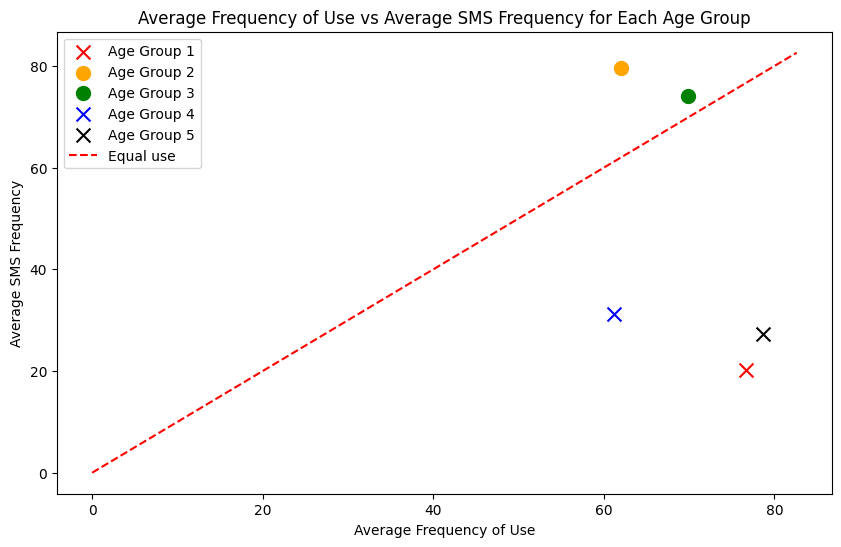

In [12]:
# Recreate 'Age Group' field from one-hot encoded columns
conditions = [
    (df['Age Group_2'] == 1),
    (df['Age Group_3'] == 1),
    (df['Age Group_4'] == 1),
    (df['Age Group_5'] == 1)
]

choices = [2, 3, 4, 5]
df['Age Group'] = np.select(conditions, choices, default=1)

# Group the data by age group and calculate the mean of 'Frequency of use' and 'Frequency of SMS'
age_group_data = df.groupby('Age Group')[['Frequency of use', 'Frequency of SMS']].mean()
age_group_data.reset_index(inplace=True)

# Create a scatter plot with the average frequency of use and average SMS frequency for each age group
fig, ax = plt.subplots(figsize=(10, 6))

markers = ['x', 'o', 'o', 'x', 'x']
colors = ['red', 'orange', 'green', 'blue', 'black']
age_groups = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5']
marker_size = 100  # Increase this value for larger markers

for i, age_group in enumerate(age_groups):
    group_data = age_group_data[age_group_data['Age Group'] == i + 1]
    ax.scatter(group_data['Frequency of use'], group_data['Frequency of SMS'], marker=markers[i], label=age_group, s=marker_size, color = colors[i])

ax.set_xlabel('Average Frequency of Use')
ax.set_ylabel('Average SMS Frequency')
ax.set_title('Average Frequency of Use vs Average SMS Frequency for Each Age Group')

# y = x line
x = np.linspace(0, max(ax.get_xlim()[1], ax.get_ylim()[1]), 100)
plt.plot(x, x, linestyle='--', color='red', label='Equal use')

ax.legend()
plt.show()




So visually, age groups 2 & 3 are the ones using SMS and calls more or less equally, or slightly tilted towards the SMS side. Age group 3 seems using SMS and calls equally.

However, on the other hand, we need to think if the number of SMS can be a valid metric vs the nymber of calls. In fact, one phone call may be equivalent to many SMS. Arbitrarily, we will consider that 1 SMS is equivalent to 30 seconds of phone conversation and let's visualize the result.

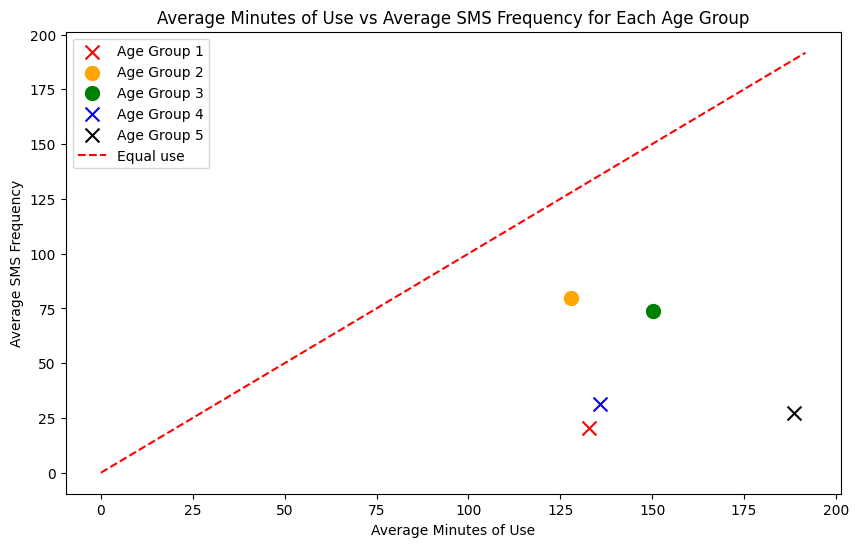

In [13]:
# Group the data by age group and calculate the mean of 'Seconds of Use' and 'Frequency of SMS'
age_group_data = df.groupby('Age Group')[['Seconds of Use', 'Frequency of SMS']].mean()

# Calculate the average minutes of use for each age group
age_group_data['Average Minutes of Use'] = age_group_data['Seconds of Use'] / 30
age_group_data.reset_index(inplace=True)

# Create a scatter plot with the average minutes of use and average SMS frequency for each age group
fig, ax = plt.subplots(figsize=(10, 6))

markers = ['x', 'o', 'o', 'x', 'x']
colors = ['red', 'orange', 'green', 'blue', 'black']
age_groups = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5']
marker_size = 100

for i, age_group in enumerate(age_groups):
    group_data = age_group_data[age_group_data['Age Group'] == i + 1]
    ax.scatter(group_data['Average Minutes of Use'], group_data['Frequency of SMS'], marker=markers[i], label=age_group, color = colors[i], s = marker_size)

ax.set_xlabel('Average Minutes of Use')
ax.set_ylabel('Average SMS Frequency')
ax.set_title('Average Minutes of Use vs Average SMS Frequency for Each Age Group')

# y = x line
x = np.linspace(0, max(ax.get_xlim()[1], ax.get_ylim()[1]), 100)
plt.plot(x, x, linestyle='--', color='red', label='Equal use')

ax.legend()

plt.show()



Using this metric, we can see that no single group is actually using SMS more than phone calls by this comparison.
However, we have been comparing averages until now. Let's observe the data with more granilarity.

We will plot each data point by itself to observe the data as a cloud distribution.

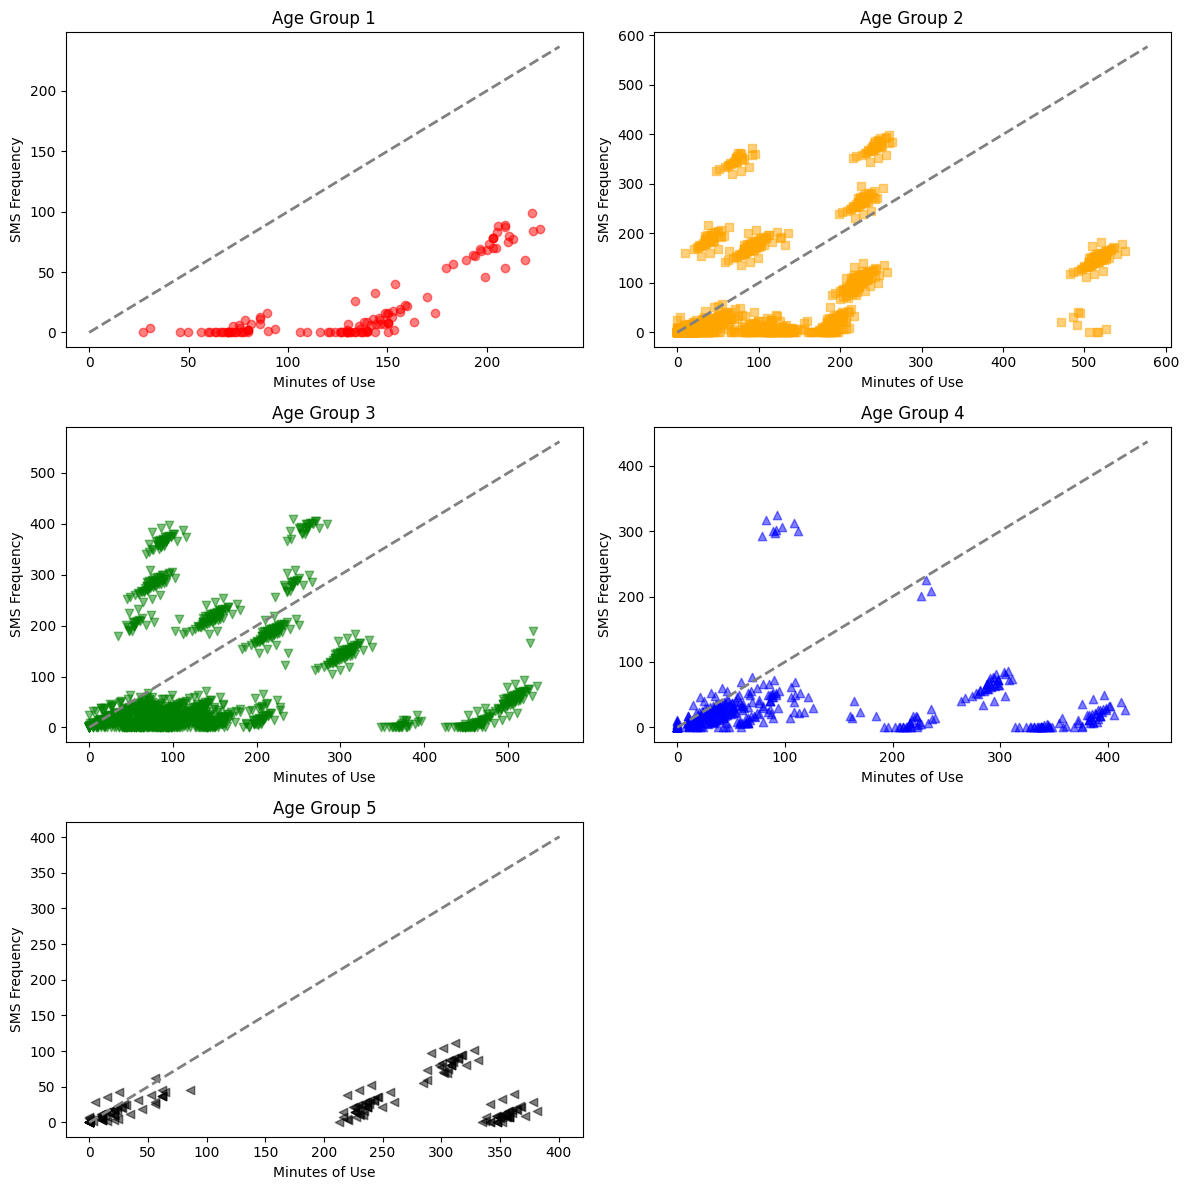

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

markers = ['o', 's', 'v', '^', '<']
age_groups = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5']
colors = ['red', 'orange', 'green', 'blue', 'black']

for i, age_group in enumerate(age_groups):
    group_data = df[df['Age Group'] == i + 1]
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.scatter(group_data['Seconds of Use'] / 30, group_data['Frequency of SMS'], marker=markers[i], alpha=0.5, color = colors[i])
    
    ax.set_xlabel('Minutes of Use')
    ax.set_ylabel('SMS Frequency')
    ax.set_title(age_group)
    
    # y = x line
    x = np.linspace(0, max(ax.get_xlim()[1], ax.get_ylim()[1]), 100)
    ax.plot(x, x, linestyle='--', color='gray', linewidth=2)

# Remove the extra subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()





We can see that the data does not suggest homodenopus use, but istead many separate clouds of data in all age groups.
Groups 1 & 5 have similar characteristics, since they seem to be phone call dominent, while group 4 seems to be a little bit more sms dominent by not by much. Groups 2 & 3 have more SMS dominance that the other 3 groups.

Next, we can calculate the portion of SMS dominance for each group.

In [15]:
# Create a new column 'SMS Dominant'
df['SMS Dominant'] = df['Frequency of SMS'] > (df['Seconds of Use'] / 30)

# Group the data by age group and calculate the mean of the 'SMS Dominant' column
sms_dominant_percentages = df.groupby('Age Group')['SMS Dominant'].mean() * 100

# Display the results
print("Percentage of users who use more SMS than phone calls (1 min of call = 1 SMS) per age group:")
print(round(sms_dominant_percentages,2))


Percentage of users who use more SMS than phone calls (1 min of call = 1 SMS) per age group:
Age Group
1     0.00
2    24.64
3    18.65
4     8.88
5     6.75
Name: SMS Dominant, dtype: float64


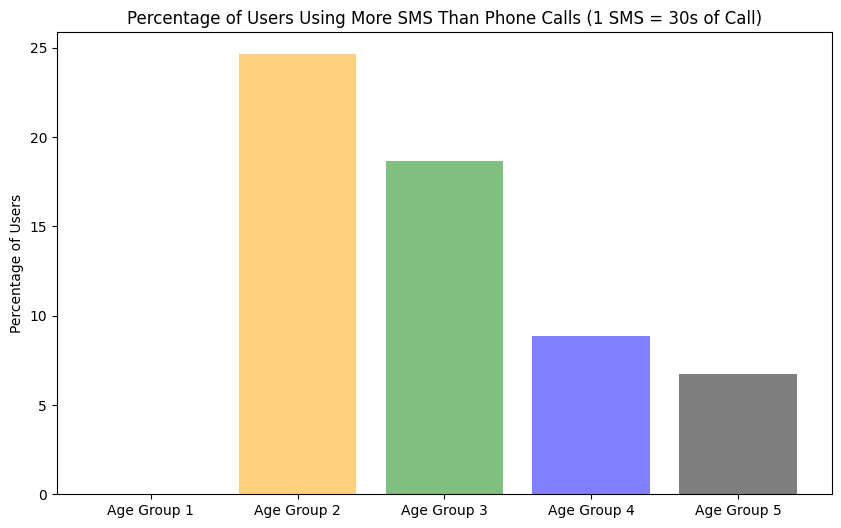

In [16]:
# Calculate the percentage of users using more SMS than phone calls for each age group
age_group_percentages = []

for i in range(1, 6):
    group_data = df[df['Age Group'] == i]
    more_sms_users = group_data[group_data['Frequency of SMS'] > group_data['Seconds of Use'] / 30]
    percentage = (len(more_sms_users) / len(group_data)) * 100
    age_group_percentages.append(percentage)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
age_groups = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5']
colors = ['red', 'orange', 'green', 'blue', 'black']
x_pos = np.arange(len(age_groups))

ax.bar(x_pos, age_group_percentages, align='center', alpha=0.5, color=colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(age_groups)
ax.set_ylabel('Percentage of Users')
ax.set_title('Percentage of Users Using More SMS Than Phone Calls (1 SMS = 30s of Call)')

plt.show()



According to this graph, it is clear that the second age group is the one shows the most SMS use among all the age groups, with users using SMS instead of phone calls 24.64% of the time.

# 5- Number of distinct phone calls patterns

In this section, we will:
- Create a plot visualizing the number of distinct phone calls by age group. 
- Within the chart, differentiate between short, medium, and long calls (by the number of seconds).
- Attempt to check if there are any patterns in the number of distinct phone calls by age group.

First, let's plot the distribution of phone calls without any distinction between the age groups.

Descriptive statistics for the number of distinct phone calls by user:
count     5.000000
mean     25.896806
std       5.721907
min      19.491820
25%      21.961229
50%      25.963446
75%      27.742331
max      34.325203
Name: Distinct Called Numbers, dtype: float64


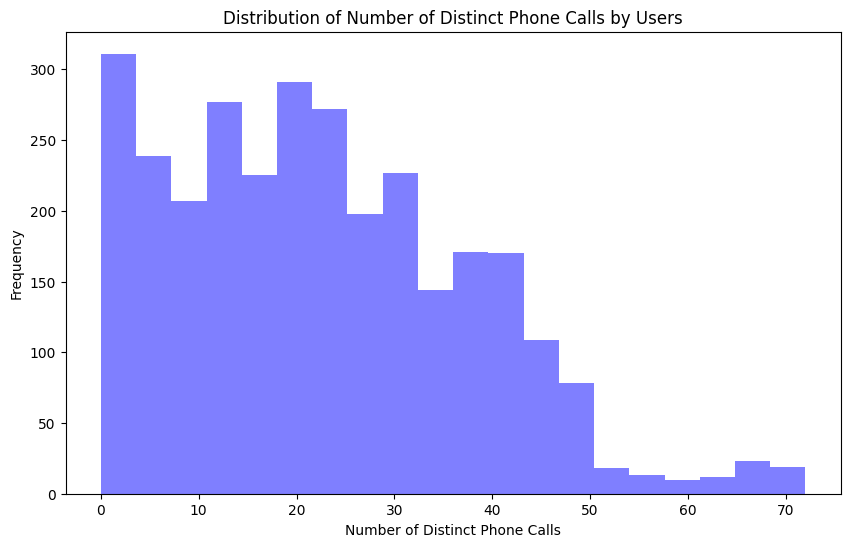

In [17]:
# Calculate the number of distinct phone calls by user
distinct_calls_by_user = df.groupby('Age Group')['Distinct Called Numbers'].mean()

# Display descriptive statistics
print("Descriptive statistics for the number of distinct phone calls by user:")
print(distinct_calls_by_user.describe())

# Plot a histogram of the number of distinct phone calls by user
fig, ax = plt.subplots(figsize=(10, 6))

df['Distinct Called Numbers'].plot(kind='hist', bins=20, color='blue', alpha=0.5)

ax.set_xlabel('Number of Distinct Phone Calls')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Distinct Phone Calls by Users')

plt.show()





We cannot distinguish a particular distribution by the naked eye at this point. It could be a lognormal distribution or a mixture of distributions characteristic of each age group.

Let's plot the distribution by age group and check if there are any other clear patterns.

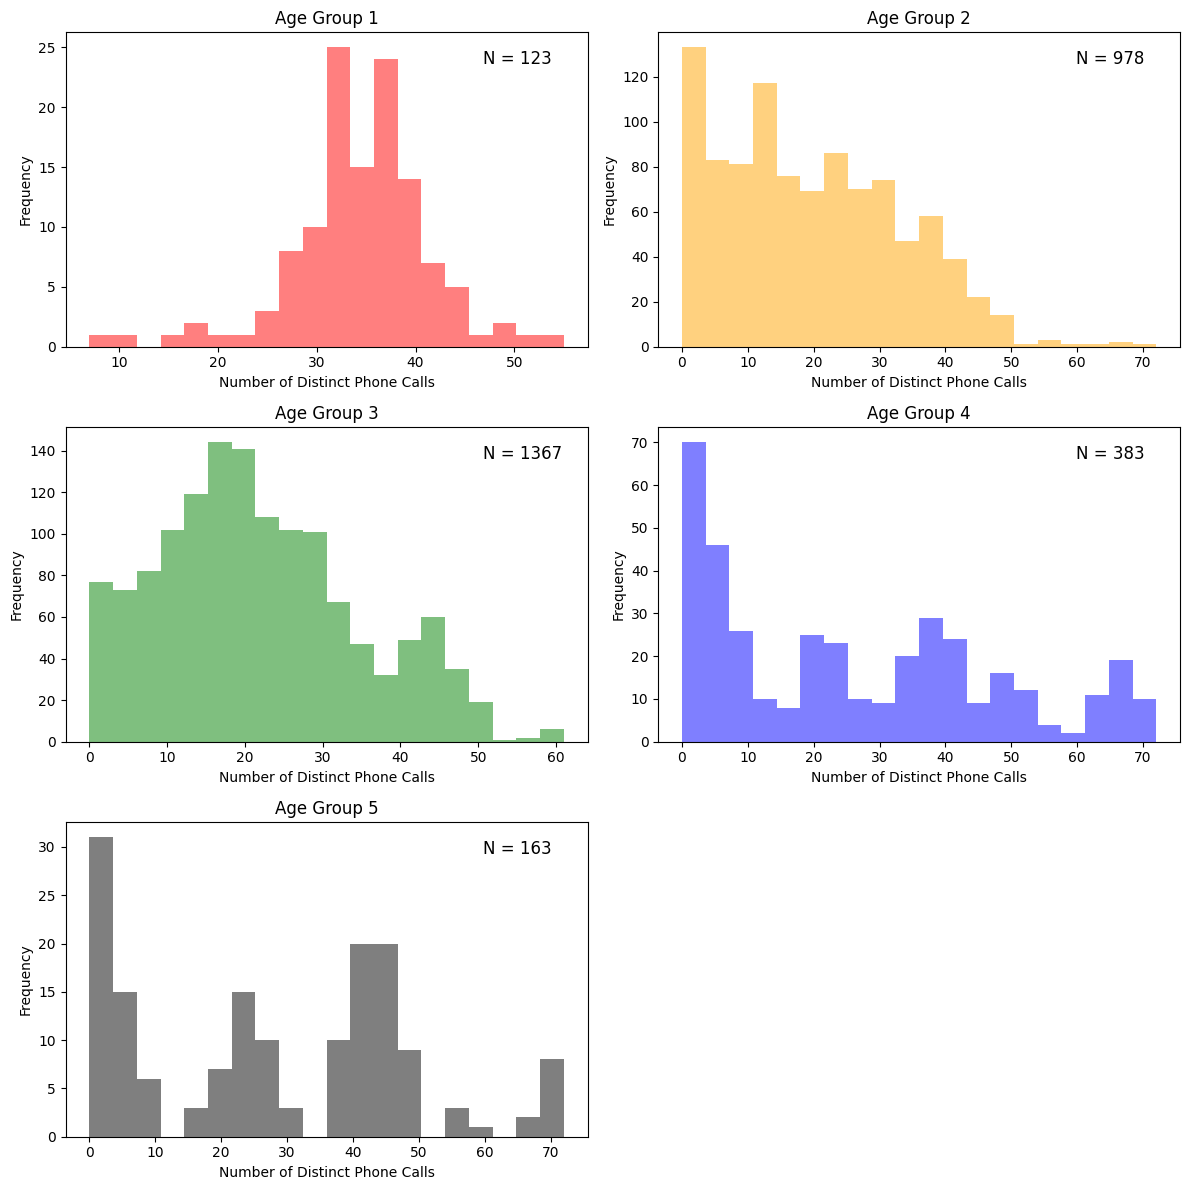

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

colors = ['red', 'orange', 'green', 'blue', 'black']
age_groups = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5']

for i, age_group in enumerate(age_groups):
    group_data = df[df['Age Group'] == i + 1]
    
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    group_data['Distinct Called Numbers'].plot(kind='hist', bins=20, color=colors[i], alpha=0.5, ax=ax)
    
    ax.set_xlabel('Number of Distinct Phone Calls')
    ax.set_ylabel('Frequency')
    ax.set_title(age_group)
    
    # Display the number of data points on the top left side
    num_data_points = len(group_data)
    ax.annotate(f'N = {num_data_points}', xy=(0.8, 0.9), xycoords='axes fraction', fontsize=12)

# Remove the extra subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


So, Group 1 seems to be normal. However, groups 4 & 5 seem to be multimodal, and thus no particular distribution can be fitted. Groups 2 & 3 could be normal or lognormal. 

We will attempt to find out which ditributions fit best of each age category. We consider the follwoing possible distributions: normal, lognormal, poisson and uniform.

In [19]:
import numpy as np
import scipy.stats as stats

# Function to fit each distribution and return KS-test statistic and p-value
def fit_distribution(data, distribution):
    if distribution.name == 'poisson':
        # Calculate lambda parameter for Poisson distribution
        params = (data.mean(),)
    else:
        params = distribution.fit(data)
        
    ks_stat, p_value = stats.kstest(data, distribution.name, args=params)
    return ks_stat, p_value


# List of candidate distributions
distributions = [stats.norm, stats.lognorm, stats.poisson, stats.uniform, stats.triang]

# Find the best fit distribution for each age group
best_fits = []

for i, age_group in enumerate(age_groups):
    group_data = df[df['Age Group'] == i + 1]['Distinct Called Numbers']
    
    # Fit each distribution and find the one with the highest p-value (best fit)
    best_distribution = None
    best_p_value = -1
    best_params = None

    for distribution in distributions:
        ks_stat, p_value = fit_distribution(group_data, distribution)
        
        if p_value > best_p_value:
            best_distribution = distribution
            best_p_value = p_value
            best_params = distribution.fit(group_data)
    
    best_fits.append((best_distribution, best_params))



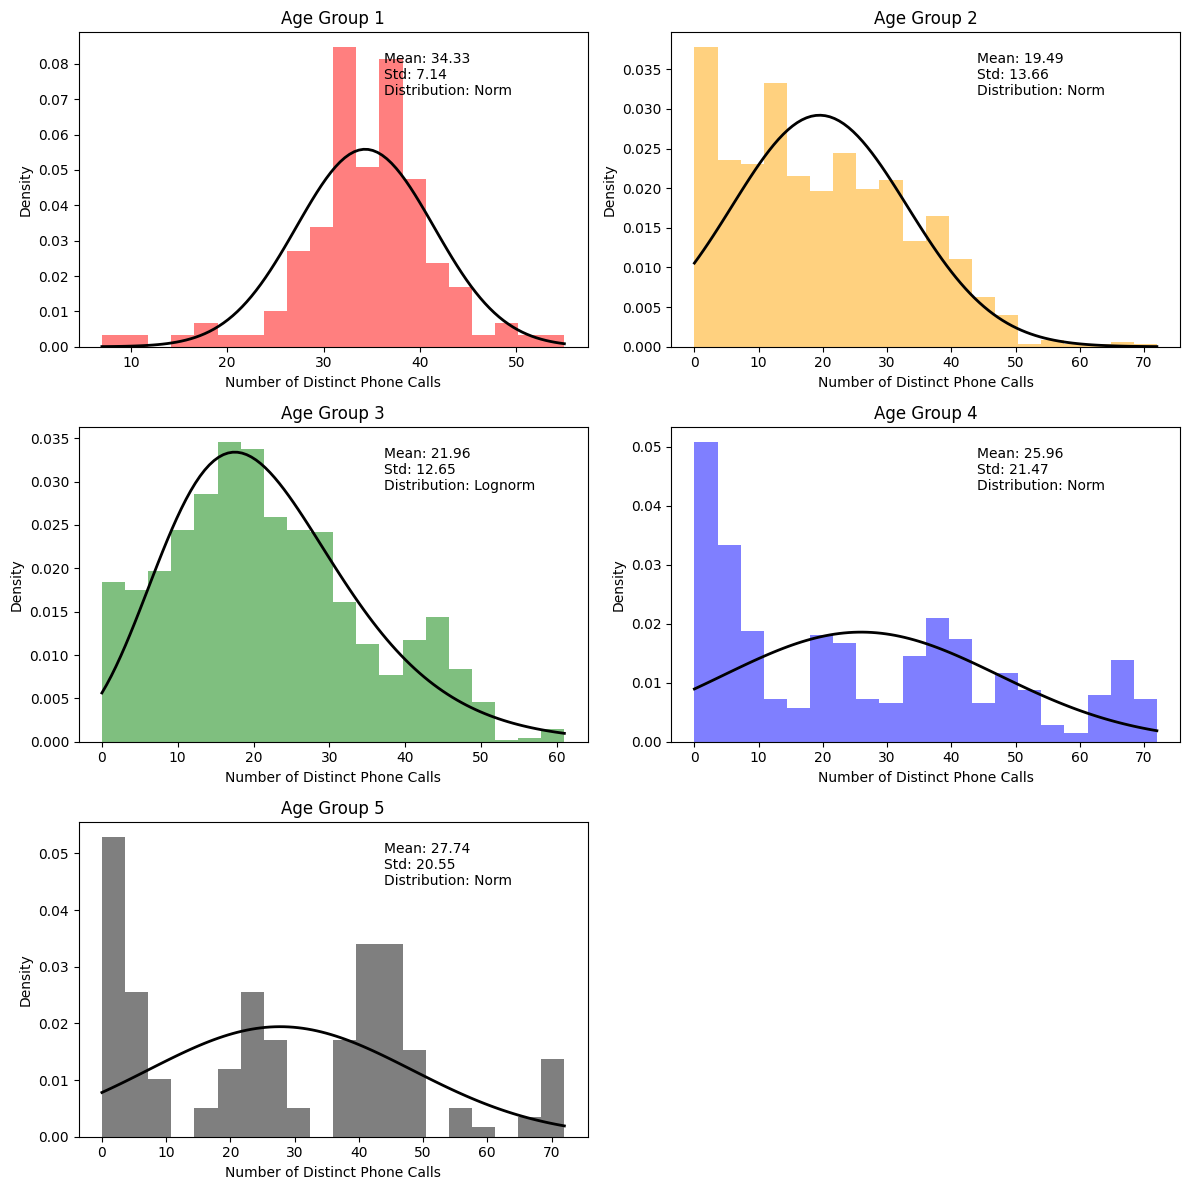

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

colors = ['red', 'orange', 'green', 'blue', 'black']

for i, age_group in enumerate(age_groups):
    group_data = df[df['Age Group'] == i + 1]['Distinct Called Numbers']
    
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Plot histogram
    n, bins, patches = ax.hist(group_data, bins=20, density=True, color=colors[i], alpha=0.5)
    
    # Plot best fit distribution curve
    best_distribution, best_params = best_fits[i]
    x = np.linspace(group_data.min(), group_data.max(), 100)
    y = best_distribution.pdf(x, *best_params)
    ax.plot(x, y, color='black', linewidth=2)
    
    ax.set_xlabel('Number of Distinct Phone Calls')
    ax.set_ylabel('Density')
    ax.set_title(age_group)
    
    # Display the mean, standard deviation, and distribution name
    mean, std = np.mean(group_data), np.std(group_data)
    distribution_name = best_distribution.name.capitalize()
    ax.annotate(f'Mean: {mean:.2f}\nStd: {std:.2f}\nDistribution: {distribution_name}', xy=(0.6, 0.8), xycoords='axes fraction', fontsize=10)

# Remove the extra subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


It appears that the first three groups nicely fit the normal/lognormal distributions. However, although the normal distribution seems to be the best fit for the 4th and 5th groups, it appears there is more to that than meets the eye. Visually, it appears that there are 5 categories to each that could be worth exploring in a later stage.

Now, to create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).

To determine the categories for short, medium, and long calls using an unsupervised learning approach, we can use the K-means clustering algorithm. We will cluster the call durations into 3 groups and then visualize the number of distinct phone calls by age group for each cluster.

First, let's cluster the call durations into 3 categories using K-means clustering. 

In [43]:
from sklearn.cluster import KMeans

df['Average Call Length'] = df['Seconds of Use'] / df['Distinct Called Numbers']

# Replace NaN values with zeros
df['Average Call Length'] = df['Average Call Length'].fillna(0)

# Clustering the average call length
kmeans = KMeans(n_clusters=3, random_state=42)
df['Call Category'] = kmeans.fit_predict(df[['Average Call Length']])



# Clustering the average call length
kmeans = KMeans(n_clusters=3, random_state=42)
df['Call Category'] = kmeans.fit_predict(df[['Average Call Length']])

# Determine the order of the categories based on the cluster centroids
centroids = kmeans.cluster_centers_.squeeze()
category_order = np.argsort(centroids)

# Create a dictionary to map the category numbers to labels
category_labels = {category_order[0]: 'Short', category_order[1]: 'Medium', category_order[2]: 'Long'}

# Add the call category labels to the dataframe
df['Call Category'] = df['Call Category'].map(category_labels)

# Print the category definitions
for category, duration in category_labels.items():
    print(f'{duration} calls centroid: {(centroids[category])/60:.2f} minutes')
    
# Calculate the limits
short_medium_limit = (centroids[category_order[0]] + centroids[category_order[1]]) / 2
medium_long_limit = (centroids[category_order[1]] + centroids[category_order[2]]) / 2

# Print the category thresholds
print(f"Short-Medium threshold: {short_medium_limit / 60:.2f} minutes")
print(f"Medium-Long threshold: {medium_long_limit / 60:.2f} minutes")






Short calls centroid: 2.23 minutes
Medium calls centroid: 6.56 minutes
Long calls centroid: 16.87 minutes
Short-Medium threshold: 4.39 minutes
Medium-Long threshold: 11.72 minutes


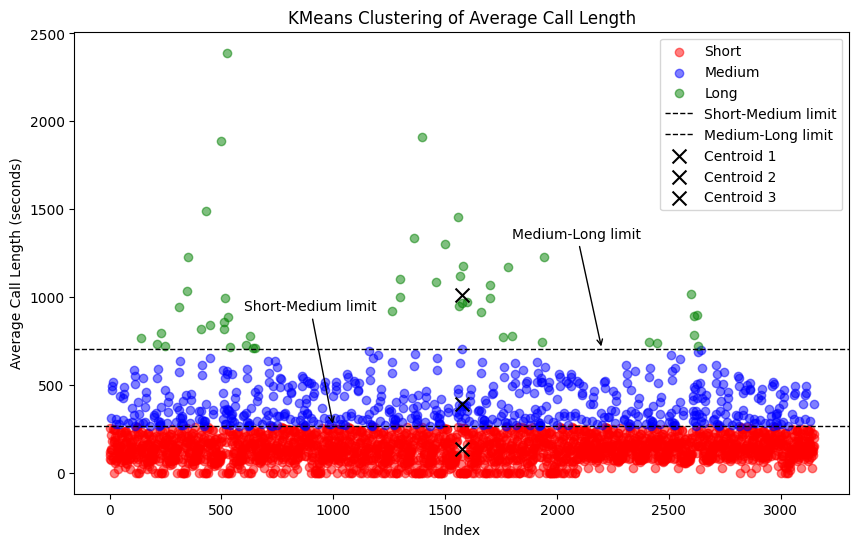

In [40]:
# Plot the data points
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Short': 'red', 'Medium': 'blue', 'Long': 'green'}
for category, color in colors.items():
    ax.scatter(df[df['Call Category'] == category].index, df[df['Call Category'] == category]['Average Call Length'], c=color, alpha=0.5, label=category)

# Draw the limit lines
ax.axhline(short_medium_limit, color='black', linestyle='--', linewidth=1, label="Short-Medium limit")
ax.axhline(medium_long_limit, color='black', linestyle='--', linewidth=1, label="Medium-Long limit")

# Annotate the limit lines
ax.annotate("Short-Medium limit", xy=(1000, short_medium_limit), xytext=(1000* 0.6, short_medium_limit * 3.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("Medium-Long limit", xy=(2200, medium_long_limit), xytext=(2000 * 0.9, medium_long_limit * 1.9), arrowprops=dict(arrowstyle="->"))

# Plot the centroids on the middle vertical axis
middle_x = (df.index.min() + df.index.max()) / 2
for i, centroid in enumerate(centroids):
    ax.scatter(middle_x, centroid, c='black', marker='x', s=100, label=f'Centroid {i+1}')

ax.set_xlabel('Index')
ax.set_ylabel('Average Call Length (seconds)')
ax.set_title('KMeans Clustering of Average Call Length')
ax.legend()

plt.show()





So it appears that we try to categorize the calls into three categories, we obtain 3 centroids at 2.23, 6.56 and 16.87 minutes. The calculated treshold between these categories were determined at 4.39 min (short-medium) and 11.72 min (medium-Long). The points will be classified according to their proximity to these points as per the Kmeans methodology.

Next, we will vizualize the number of distinct phone calls by age group for each call category  (short, medium & large) and analyze the patterns obtained from the vizualization.

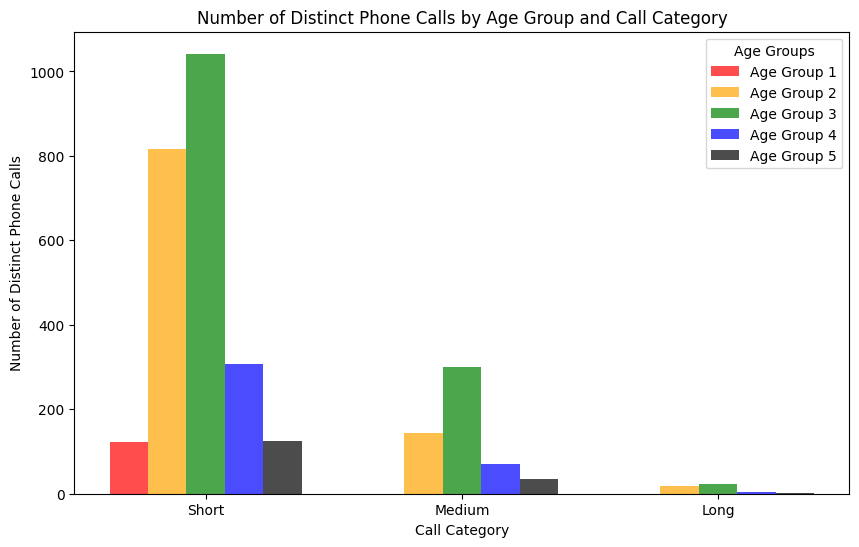

In [41]:


# Plot the number of distinct phone calls by age group for each call category
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['red', 'orange', 'green', 'blue', 'black']
age_groups = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4', 'Age Group 5']
categories = ['Short', 'Medium', 'Long']

bar_width = 0.15
bar_positions = np.arange(len(categories))

for i, age_group in enumerate(age_groups):
    group_data = df[df['Age Group'] == i + 1]
    
    # Count the number of distinct phone calls in each call category for the current age group
    call_counts = group_data.groupby('Call Category')['Distinct Called Numbers'].count()
    
    # Sort the call_counts in the desired order
    sorted_counts = pd.Series([0, 0, 0], index=categories)
    sorted_counts.update(call_counts)
    call_counts = sorted_counts
    
    for j, category in enumerate(categories):
        age_group_position = bar_positions[j] + i * bar_width
        ax.bar(age_group_position, call_counts[category], width=bar_width, color=colors[i], alpha=0.7, label=age_group if j == 0 else None)

ax.set_xticks(bar_positions + 2 * bar_width)
ax.set_xticklabels(categories)
ax.set_xlabel('Call Category')
ax.set_ylabel('Number of Distinct Phone Calls')
ax.legend(title='Age Groups', loc='upper right')
plt.title('Number of Distinct Phone Calls by Age Group and Call Category')

plt.show()

It appears that most calls are short for all age groups. In addition, Group 3 seems to be higher in volume than the other age groups across the board. Group 1 on the other hand seems to be exclusively made of short calls.